## Fetch Data 

In [15]:
# import sys
# sys.path.append('../allstuffdata')

import config
from config import *
from utils import *

import plotly.express as px
import datetime
import json

In [16]:
text_dict = {}

## How's the economy doing... now?

### GDP Now - St. Louis, Fed

In [17]:
url = ('https://api.stlouisfed.org/fred/series?series_id=GDPNOW&'+
       f'api_key={fred_key}&file_type=json')
r = requests.get(url).json()
update = r['seriess'][0]['last_updated']
url = ('https://api.stlouisfed.org/fred/series/observations?series_id=GDPNOW&'+
       f'api_key={fred_key}&file_type=json')
r = requests.get(url).json()
lv = pd.DataFrame(r['observations']).set_index('date')['value'].sort_index()[-1]
lvt = f'{float(lv):.1f}'
dt1 = pd.DataFrame(r['observations']).set_index('date')['value'].sort_index().index[-1]
ltdt = dtxt(dt1)['qtr1']
text = (f'The latest GDPNow (FRB Atlanta) nowcast for {ltdt} is {lvt} percent, as '+
        f'of {dtxt(pd.to_datetime(update))["day1"]}')
write_txt(text_dir / 'gdpnow.txt', text)
text_dict['gdpnow'] = text
print(text)

The latest GDPNow (FRB Atlanta) nowcast for 2022 Q3 is 2.9 percent, as of October 19, 2022


In [18]:
df = pd.DataFrame(r['observations'])
df['value'] = pd.to_numeric(df['value'])
df = df[['date','value']]
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.columns = ['GDPNow (FRB Atlanta)']
df.tail()

,GDPNow (FRB Atlanta)
date,
2021-07-01,0.1950
2021-10-01,6.4986
2022-01-01,0.3728
2022-04-01,-1.2002
2022-07-01,2.8522


### St. Louis Fed Economic News Index: Real GDP Nowcast

In [19]:
url = ('https://api.stlouisfed.org/fred/series?series_id=STLENI&'+
       f'api_key={fred_key}&file_type=json')
r = requests.get(url).json()
update = r['seriess'][0]['last_updated']
url = ('https://api.stlouisfed.org/fred/series/observations?series_id=STLENI&'+
       f'api_key={fred_key}&file_type=json')
r = requests.get(url).json()
lv = pd.DataFrame(r['observations']).set_index('date')['value'].sort_index()[-1]
lvt = f'{float(lv):.1f}'
dt1 = pd.DataFrame(r['observations']).set_index('date')['value'].sort_index().index[-1]
ltdt = dtxt(dt1)['qtr1']
text = (f'The latest nowcast (FRB St. Louis) for {ltdt} is {lvt} percent, as '+
        f'of {dtxt(pd.to_datetime(update))["day1"]}')
write_txt(text_dir / 'st_louis_gdp_nowcast.txt', text)
text_dict['st_louis_gdp_nowcast'] = text
print(text)

The latest nowcast (FRB St. Louis) for 2022 Q3 is 1.2 percent, as of October 14, 2022


In [20]:
df1 = pd.DataFrame(r['observations'])
df1['value'] = pd.to_numeric(df1['value'])
df1 = df1[['date','value']]
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('date')
df1.columns = ['Real GDP Nowcast (FRB St. Louis)']
df1.tail()

,Real GDP Nowcast (FRB St. Louis)
date,
2021-07-01,6.85
2021-10-01,3.75
2022-01-01,1.96
2022-04-01,4.10
2022-07-01,1.17


### Real GDP growth rate

In [21]:
url = ('https://api.stlouisfed.org/fred/series?series_id=A191RL1Q225SBEA&'+
       f'api_key={fred_key}&file_type=json')
r = requests.get(url).json()
update = r['seriess'][0]['last_updated']
url = ('https://api.stlouisfed.org/fred/series/observations?series_id=A191RL1Q225SBEA&'+
       f'api_key={fred_key}&file_type=json')
r = requests.get(url).json()
lv = pd.DataFrame(r['observations']).set_index('date')['value'].sort_index()[-1]
lvt = f'{float(lv):.1f}'
dt1 = pd.DataFrame(r['observations']).set_index('date')['value'].sort_index().index[-1]
ltdt = dtxt(dt1)['qtr1']
text = (f'The {ltdt} print of real GDP is {lvt} percent')
text_dict['real_gdp'] = text
write_txt(text_dir / 'real_gdp.txt', text)
print(text)

The 2022 Q2 print of real GDP is -0.6 percent


In [22]:
df2 = pd.DataFrame(r['observations'])
df2['value'] = pd.to_numeric(df2['value'])
df2 = df2[['date','value']]
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
df2.columns = ['Real Gross Domestic Product']
df2.tail()

,Real Gross Domestic Product
date,
2021-04-01,7.0
2021-07-01,2.7
2021-10-01,7.0
2022-01-01,-1.6
2022-04-01,-0.6


### Making a  Plot

In [23]:
final = pd.concat([df,df1,df2],axis=1)
final = final['2013-01-01':]
final['Quarters'] = final.index
final = pd.melt(final, id_vars='Quarters', value_vars=final.columns[:-1])
final.columns = ['Quarters', 'Index', 'value']

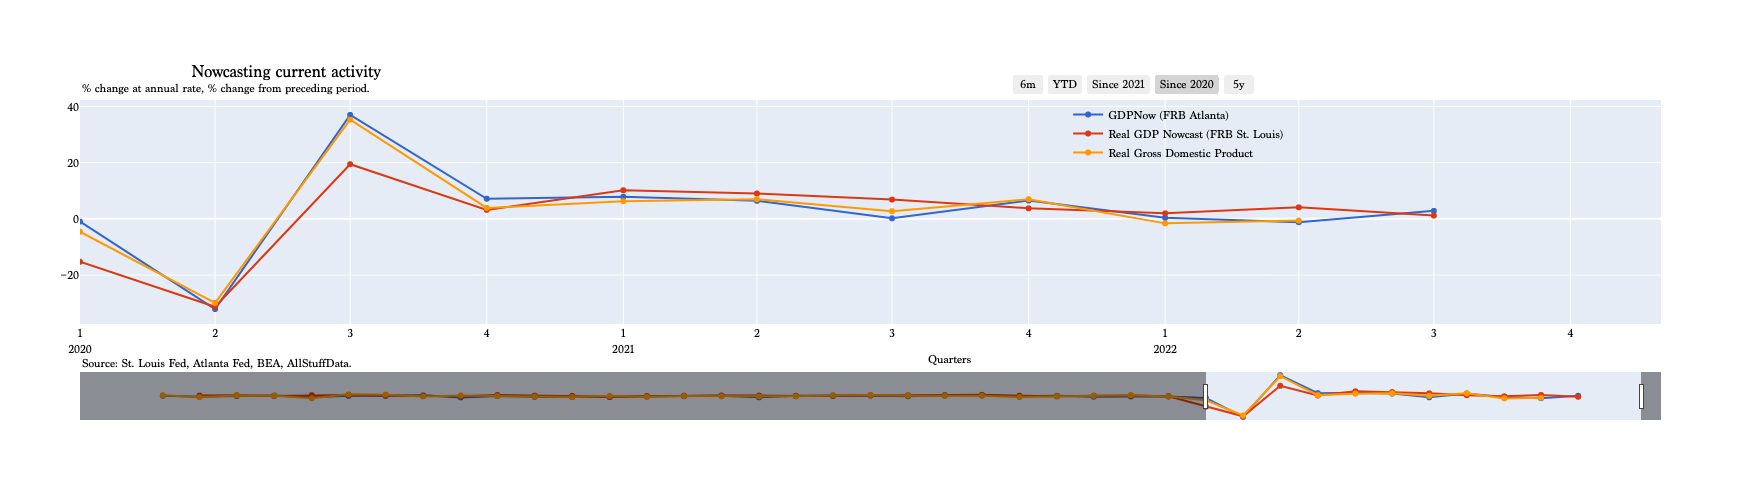

In [24]:
# plotly express
fig = px.line(
    final,
    x='Quarters', 
    y='value', 
    color='Index',
    title="Nowcasting current activity",
    width=750, 
    height=500,
    labels=dict(value="",Quarters=""),
    markers=True,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.update_layout(
    font_family="Marion",
    font_color="black",
    title_font_family="Marion",
#     title_font_color="red",
#     legend_title_font_color="green"
)
fig.update_xaxes(rangeslider_visible=True
                 ,range=[datetime.date(2020, 1, 1), datetime.date(2022, 12, 1)]
                 )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=2, label="Since 2021", step="year", stepmode="todate"),
            dict(count=3, label="Since 2020", step="year", stepmode="todate"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
#             dict(count=10, label="10y", step="year", stepmode="backward"),
#             dict(step="all")
        ]),
        x=0.59
    )
)

fig.update_xaxes(
    dtick="M3",
    tickformat="%q\n%Y",
)
fig.update_layout(legend={'title_text':''})

fig.update_layout(legend=dict(
    yanchor="top",
    y=1,
    xanchor="left",
    x=0.625
))

#Source
fig.add_annotation(
    x=0, 
    y=-0.22, 
    xref='paper',
    yref='paper',
    text="Source: St. Louis Fed, Atlanta Fed, BEA, AllStuffData.",
    showarrow=False,
)

#X-Axis
fig.add_annotation(
    x=0.55, 
    y=-0.2, 
    xref='paper',
    yref='paper',
    text="Quarters",
    showarrow=False,
)

# Y-Axis
fig.add_annotation(
    x=0, 
    y=1.08, 
    xref='paper',
    yref='paper',
    text="% change at annual rate, % change from preceding period.",
    showarrow=False,
)

# Title
fig.update_layout(title_y=0.87,title_x=0.11)

#Legend- Color
fig.update_layout(legend = dict(bgcolor = 'rgba(0,0,0,0)'))

fig.show()
fig.write_html("../dashboards/gdp_nowcasts.html")

In [25]:
#Convert Dict to Json

In [31]:
with open("texts.json", "w") as outfile:
    json.dump(text_dict, outfile)

### GDP components

In [ ]:
pop = nipa_df(retrieve_table('T20100')['Data'], ['B230RC'])['B230RC']

srs = {'A191RX': '\hspace{0.5mm} {\color{red!95!black}\\textbf{---}} Gross Domestic Product', 
       'DPCERX': '\hspace{2.5mm} {\color{yellow!45!orange}\\textbf{---}} Consumer Spending', 
       'A006RX': '\hspace{2.5mm} {\color{blue!70!black}\\textbf{---}} Gross Private Domestic Investment', 
       'A822RX': '\hspace{2.5mm} {\color{cyan!60!white}\\textbf{---}} Government Spending and Investment',
       'A019RX': '\hspace{2.5mm} {\color{green!60!black}\\textbf{---}} Net Exports', 
       'A020RX': '\hspace{7.5mm} Exports', 'A021RX': '\hspace{7.5mm} Less: Imports'}
s = [key for key, value in srs.items()]
s2 = [i[:-1].replace('A02', 'B02') + 'C' for i in s]
df = nipa_df(retrieve_table('T10106')['Data'], s).sort_index()
df2 = nipa_df(retrieve_table('T10105')['Data'], s2).sort_index()

dfpop = df.div(pop, axis=0)
real_vals = df2.rename({i: i.replace('RC', 'RX').replace('B02', 'A02') 
                        for i in s2}, axis=1).iloc[-1]
data = ((dfpop / dfpop.iloc[-1]) * (real_vals / pop.iloc[-1])).loc['1989':]

sel_cols = ['DPCERX', 'A006RX', 'A019RX', 'A822RX']

data[sel_cols].to_csv(data_dir / 'gdp_pc_comp.csv', index_label='date')

pce = f'\${data.DPCERX.iloc[-1] * 1000:,.0f}'
inv = f'\${data.A006RX.iloc[-1] * 1000:,.0f}'
gov = f'\${data.A822RX.iloc[-1] * 1000:,.0f}'
exp = f'\${abs(data.A019RX.iloc[-1]) * 1000:,.0f}'
ltdt = dtxt(data.index[-1])['qtr1']
pce_diff = f'\${(data.DPCERX.iloc[-1] - data.DPCERX.iloc[0]) * 1000:,.0f}'

text = ('Much of the increase in real GDP per capita over the past '+
        '30 years comes from consumer spending. Domestic consumer '+
        'spending (see {\color{yellow!45!orange}\\textbf{---}}) is '+
        f'equivalent to {pce} per person in {ltdt}, a price-adjusted '+
        f'increase of {pce_diff} since 1989. Gross private domestic '+
        'investment (see {\color{blue!70!black}\\textbf{---}}) is '+
        f'equivalent to {inv} per person in {ltdt}, and government '+
        'spending and investment (see {\color{cyan!60!white}\\textbf{---}}) '+
        f'totals {gov} per person. Net exports equivalent to {exp} per '+
        'person are subtracted to reflect only domestic production '+
        '(see {\color{green!60!black}\\textbf{---}}).')

write_txt(text_dir / 'gdp_pc_comp.txt', text)
write_txt(text_dir / 'gdp_ltdt.txt', ltdt)
print(text)

res = data * 1000
lt = res.rename(srs, axis=1).iloc[-1]
lt.name = dtxt(lt.name)['qtr1']
pr = res.rename(srs, axis=1).loc['2019-10-01']
pr.name = dtxt(pr.name)['qtr1']
p00 = res.rename(srs, axis=1).loc['2000-01-01']
p00.name = dtxt(p00.name)['qtr1']
fi = res.rename(srs, axis=1).iloc[0]
fi.name = dtxt(fi.name)['qtr1']
table = pd.concat([lt, pr, p00, fi], axis=1).applymap('{:,.0f}'.format)
table.iloc[0, 0] = f'\${table.iloc[0, 0]}'
table.to_csv(data_dir / 'gdppc_levels.tex', sep='&', 
             line_terminator='\\\ ', quotechar=' ')